In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, linear, softmax
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0  


In [3]:
print(f"x_train  : {x_train.shape}")
print(f"y_train  : {y_train.shape}")
print(f"x_test   : {x_test.shape}")
print(f"y_test   : {y_test.shape}")
print(f"unique classes: {np.unique(y_train)}")

x_train  : (60000, 28, 28)
y_train  : (60000,)
x_test   : (10000, 28, 28)
y_test   : (10000,)
unique classes: [0 1 2 3 4 5 6 7 8 9]


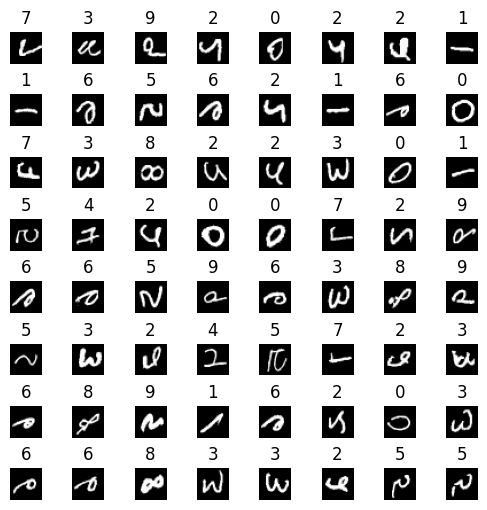

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n, _ = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [5]:
print ('The first element of y is: ', y_train[0])
print ('The last element of y is: ', y_train[-1])


The first element of y is:  5
The last element of y is:  8


# model

In [6]:
model = Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        Flatten(),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ]
)

In [130]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

# compile

In [7]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=50
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7966 - loss: 0.7072
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9405 - loss: 0.2020
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9510 - loss: 0.1641
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9578 - loss: 0.1431
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1286
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1180
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9665 - loss: 0.1100
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9687 - loss: 0.1024
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - loss: 0.0935
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9740 - loss: 0.0910
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0843
Epoch 12/50
1875/1875 ━━━━━━━━

In [8]:
prediction = model.predict(x_train[0].reshape(-1,28,28))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f" Actual value: {y_train[0]}")

prediction = model.predict(x_train[150].reshape(-1,28,28))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f" Actual value: {y_train[150]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
 predicting a Two: 
[[-28.794569 -16.61248  -14.827979  16.95984  -80.4054    23.203018
  -33.85541  -19.493168 -13.342964 -19.267996]]
 Largest Prediction index: 5
 Actual value: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
 predicting a Two: 
[[-13.045192  -16.39239   -14.52913   -18.130892   14.599095   -4.3534465
  -12.006759   -1.7274817  -6.396016   -4.8117256]]
 Largest Prediction index: 4
 Actual value: 4


# test

In [9]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Doğruluğu: {test_acc}')


313/313 - 0s - 1ms/step - accuracy: 0.9614 - loss: 0.2061
Test Doğruluğu: 0.9613999724388123


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


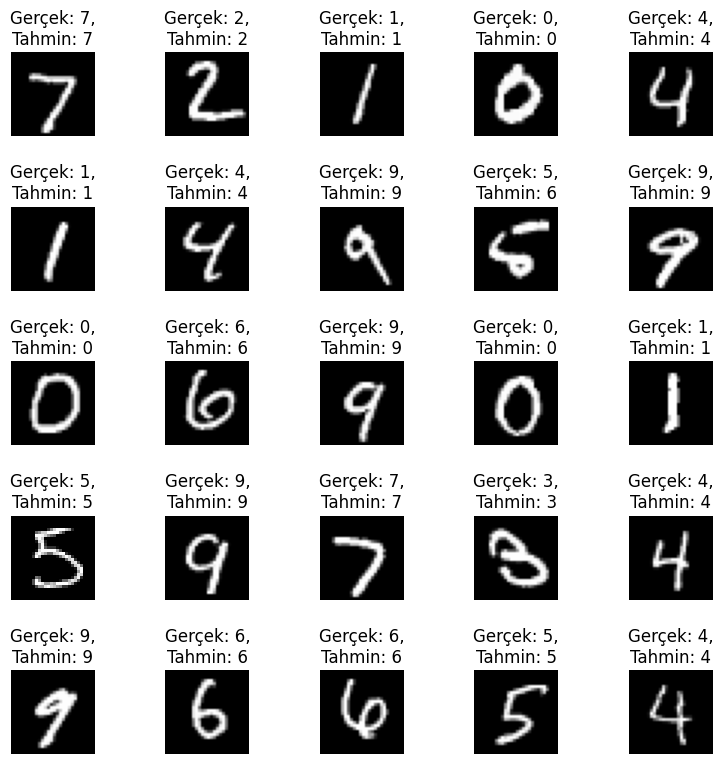

In [10]:
# İlk 10 test görüntüsü üzerinde tahmin yap
predictions = model.predict(x_test[:25])

# Logits'leri softmax ile olasılıklara dönüştür
predictions = tf.nn.softmax(predictions).numpy()

# Görüntüle
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
fig.tight_layout(pad=2.0)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"Gerçek: {y_test[i]},\nTahmin: {np.argmax(predictions[i])}")
    ax.axis('off')

plt.show()